In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


### Setup

In [3]:
tf_path = "../Results/scores_TF.csv"
tfidf_path = "../Results/scores_TFIDF.csv"
wfidf_path = "../Results/scores_WFIDF.csv"
links_path = "../../10-Ks/allLinks.csv"
tickers_path = "../../Data/Tickers US 2018-2022.xlsx"

tf_scores = pd.read_csv(tf_path)
tfidf_scores = pd.read_csv(tfidf_path)
wfidf_scores = pd.read_csv(wfidf_path)
all_links = pd.read_csv(links_path)
all_tickes = pd.read_excel(tickers_path)

tfidf_scores = tfidf_scores.rename(columns={"Doc_ID": "accessionNumber"})
wfidf_scores = wfidf_scores.rename(columns={"Doc_ID": "accessionNumber"})

In [4]:
print('Nr. of Tickers: ', len(all_tickes))
print('Nr. of Links: ', len(all_links))
print('Nr. of Scores: ', len(tf_scores))

Nr. of Tickers:  12553
Nr. of Links:  68855
Nr. of Scores:  42130


### TFIDF Adjustments

In [5]:
complete_tfidf = pd.merge(tfidf_scores, all_links[['accessionNumber', 'CompTick']], on='accessionNumber', how='left')
complete_tfidf = complete_tfidf.sort_values(by=['CompTick']).reset_index(drop=True)
altered_tfidf = complete_tfidf.drop_duplicates(subset = 'accessionNumber', keep='first')
altered_tfidf = altered_tfidf.drop(columns=['document_length', 'accessionNumber'])
altered_tfidf = altered_tfidf[(altered_tfidf == 0).sum(axis=1) < 2].reset_index(drop=True)

In [6]:
altered_tfidf.head()

,innovation,integrity,quality,respect,teamwork,CompTick
0,112.344171,7.577572,68.167115,4.055965,58.520767,a
1,91.574985,51.221925,174.356743,25.491536,54.800553,a
2,10.143608,5.133106,20.553593,1.907059,10.469807,a
3,41.289797,23.751006,49.987498,6.895876,14.803388,a
4,45.683293,20.581919,60.802903,20.952473,61.838825,a


In [7]:
def average_values(df, key_col, val_col):
    # Check for valid input
    if key_col not in df.columns or val_col not in df.columns:
        return "Invalid column names provided."

    # Group by the key column
    grouped = df.groupby(key_col)

    # Dictionary to store the results
    averages = {}

    for name, group in grouped:
        # Sort the values and remove the smallest and largest
        sorted_values = sorted(group[val_col])
        if len(sorted_values) > 2:
            trimmed_values = sorted_values[1:-1]  # Remove the smallest and largest values
            # Calculate the average of remaining values
            avg = sum(trimmed_values) / len(trimmed_values)
            averages[name] = avg
        else:
            averages[name] = sum(sorted_values) / len(sorted_values)

    return averages


In [8]:
key_column = 'CompTick'
value_column = 'innovation'

tickers = altered_tfidf['CompTick'].drop_duplicates().reset_index(drop=True).to_list()

values = ['innovation', 'integrity', 'quality', 'respect', 'teamwork']

scores_final = pd.DataFrame(index = tickers)
scores_final
for i in values:
    key_column = 'CompTick'
    value_column = i
    result = average_values(altered_tfidf, key_column, value_column)
    scores_final[i] = scores_final.index.map(result)

In [9]:
sp_ranking = pd.read_excel('S&P Ranking.xlsx', index_col=0)

In [10]:
scores_final = scores_final.reset_index()
scores_final = scores_final.rename(columns={'index': 'ticker'})

sp_ranking.reset_index(inplace=True)    
sp_ranking = sp_ranking.rename(columns={'Symbol': 'ticker'})

In [11]:
sp_scores = pd.merge(sp_ranking, scores_final, on='ticker', how = 'inner')


### WFIDF Adjustments

In [12]:
complete_wfidf = pd.merge(wfidf_scores, all_links[['accessionNumber', 'CompTick']], on='accessionNumber', how='left')
complete_wfidf = complete_wfidf.sort_values(by=['CompTick']).reset_index(drop=True)
altered_wfidf = complete_wfidf.drop_duplicates(subset = 'accessionNumber', keep='first')
altered_wfidf = altered_wfidf.drop(columns=['document_length', 'accessionNumber'])
altered_wfidf = altered_wfidf[(altered_wfidf == 0).sum(axis=1) < 2].reset_index(drop=True)

In [13]:
altered_wfidf.head()

,innovation,integrity,quality,respect,teamwork,CompTick
0,83.393156,7.279025,51.810881,3.089766,30.054347,a
1,77.067841,40.681859,100.050188,12.756695,36.371012,a
2,9.151124,3.563079,16.375188,1.907059,9.463219,a
3,32.060726,20.149020,37.419657,6.895876,11.612147,a
4,36.704517,16.653758,43.148343,17.365688,49.923198,a


In [14]:
def average_values(df, key_col, val_col):
    # Check for valid input
    if key_col not in df.columns or val_col not in df.columns:
        return "Invalid column names provided."

    # Group by the key column
    grouped = df.groupby(key_col)

    # Dictionary to store the results
    averages = {}

    for name, group in grouped:
        # Sort the values and remove the smallest and largest
        sorted_values = sorted(group[val_col])
        if len(sorted_values) > 2:
            trimmed_values = sorted_values[1:-1]  # Remove the smallest and largest values
            # Calculate the average of remaining values
            avg = sum(trimmed_values) / len(trimmed_values)
            averages[name] = avg
        else:
            averages[name] = sum(sorted_values) / len(sorted_values)

    return averages


In [15]:
tickers = altered_wfidf['CompTick'].drop_duplicates().reset_index(drop=True).to_list()

values = ['innovation', 'integrity', 'quality', 'respect', 'teamwork']

scores_final = pd.DataFrame(index = tickers)

for i in values:
    key_column = 'CompTick'
    value_column = i
    result = average_values(altered_wfidf, key_column, value_column)
    scores_final[i] = scores_final.index.map(result)

In [16]:
sp_ranking = pd.read_excel('S&P Ranking.xlsx', index_col=0)

In [17]:
scores_final = scores_final.reset_index()
scores_final = scores_final.rename(columns={'index': 'ticker'})

sp_ranking.reset_index(inplace=True)    
sp_ranking = sp_ranking.rename(columns={'Symbol': 'ticker'})

In [26]:
scores_final.describe()

,innovation,integrity,quality,respect,teamwork
count,5411.000000,5411.000000,5411.000000,5411.000000,5411.000000
mean,47.822802,16.018320,47.816620,11.267039,32.343900
std,37.059694,15.768085,30.779789,15.565019,22.980339
min,0.000000,0.000000,0.334028,0.000000,0.114075
25%,27.786445,7.279746,30.100098,4.623172,19.111222
50%,39.912959,11.849020,41.344101,7.885853,27.689385
75%,56.863115,19.465071,56.240916,12.605979,38.654842
max,539.320625,276.110789,418.934670,300.708476,276.170046


In [27]:
scores_final.to_excel('scores_wfidf_raw.xlsx')

In [22]:
scores_final.head()

,ticker,innovation,integrity,quality,respect,teamwork
0,a,39.715914,17.536791,41.987613,9.581187,23.755850
1,aa,47.539685,19.752828,65.696622,14.877453,43.878597
2,aaau,15.794388,2.009696,3.547135,3.110285,37.554562
3,aaci,25.191359,5.299777,26.445060,5.163449,11.192057
4,aadi,40.293203,17.684172,54.018857,9.884953,30.389047


In [24]:
sp_scores.describe()

,Rank,innovation,integrity,quality,respect,teamwork
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,257.078704,73.997783,24.316136,90.077063,16.087885,51.332891
std,143.496925,56.847529,40.673517,65.482193,23.837380,46.266493
min,1.000000,0.826943,0.000000,1.428219,0.000000,2.444514
25%,137.750000,39.298431,8.376142,51.422982,6.258476,24.191923
50%,260.500000,58.522584,15.214271,71.793040,10.701257,39.155406
75%,381.250000,92.929715,28.040575,107.924798,18.764146,60.349609
max,503.000000,518.320936,500.347150,576.171357,305.620371,494.968798


In [20]:
sp_scores_wfidf = pd.merge(sp_ranking, scores_final, on='ticker', how = 'inner')

In [21]:
sp_scores_wfidf.describe()

,Rank,innovation,integrity,quality,respect,teamwork
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,257.078704,52.585134,17.151718,50.092589,11.719688,32.595797
std,143.496925,34.655124,22.165343,27.290565,16.969457,22.056868
min,1.000000,0.826943,0.000000,1.428219,0.000000,2.444514
25%,137.750000,30.920659,7.242997,33.194720,5.082884,18.121651
50%,260.500000,44.567338,11.583031,43.479628,8.026818,27.682493
75%,381.250000,65.321694,19.908179,61.082752,12.944218,39.596044
max,503.000000,277.185431,276.110789,223.669964,206.826939,183.333847


In [26]:
#sp_scores_wfidf.to_excel('sp_scores_wfidf.xlsx')

In [36]:
vars = ['innovation','integrity','quality','respect', 
            'teamwork'] 

In [37]:
scores_final.describe().to_excel('summary_scores_wfidf.xlsx')

In [55]:
scores_final.head().to_excel('sample_scores_raw.xlsx')

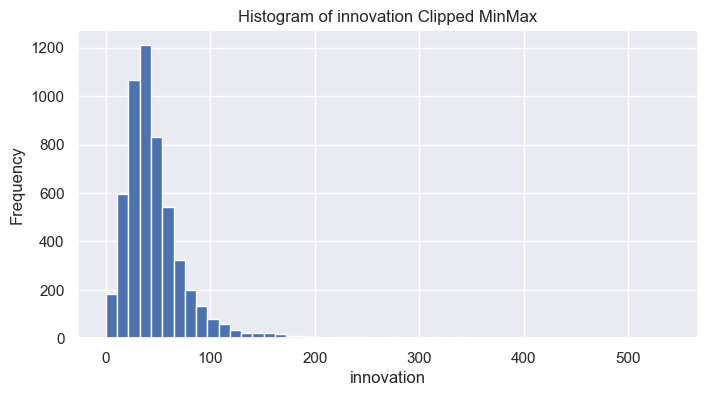

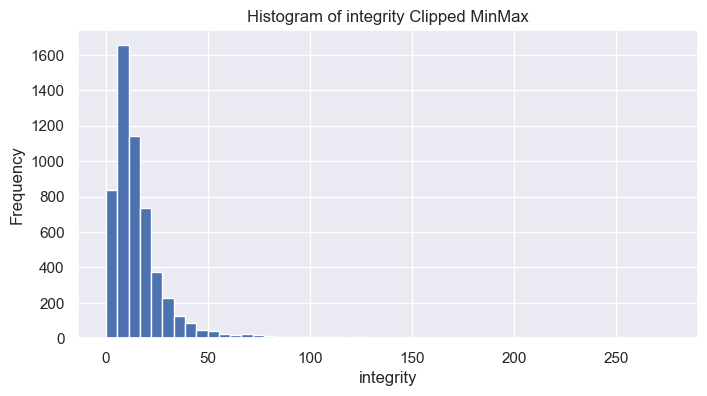

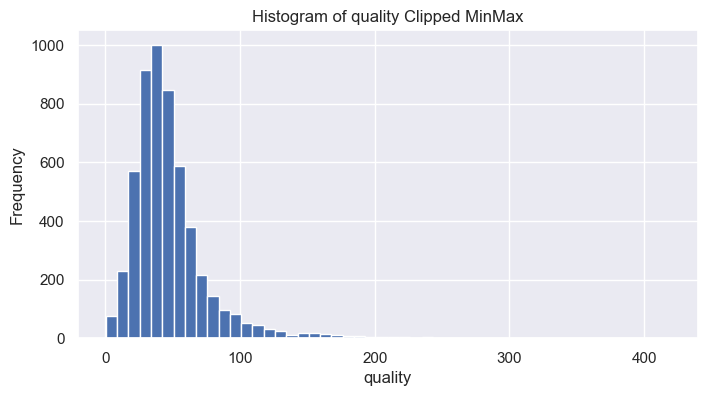

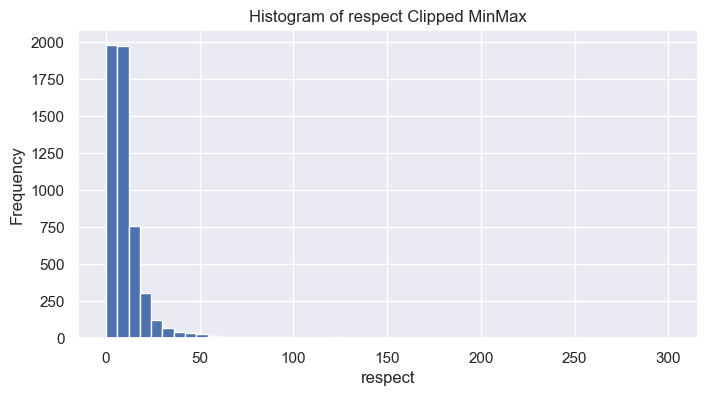

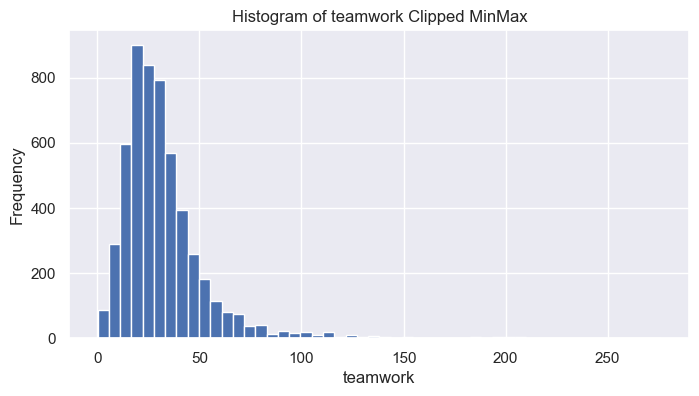

In [38]:
for column in vars:
    plt.figure(figsize=(8, 4))  # Specify the figure size for each histogram
    scores_final[column].hist(bins=50)  # You can adjust the number of bins
    plt.title(f'Histogram of {column} Clipped MinMax')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [34]:
# clipping deata (replacing values above a certain threshold with the threshold value)
scores_clipped = scores_final.copy()

# Define cutoff values for each column
cutoffs = {
    'innovation': 150,
    'integrity': 60,
    'quality': 120,
    'respect': 50,
    'teamwork': 90
}

# Drop rows where any column value exceeds its respective cutoff value
scores_clipped, cutoffs = scores_clipped.align(pd.Series(cutoffs), axis=1, copy=False)
scores_clipped = scores_clipped[~(scores_clipped > cutoffs).any(axis=1)]

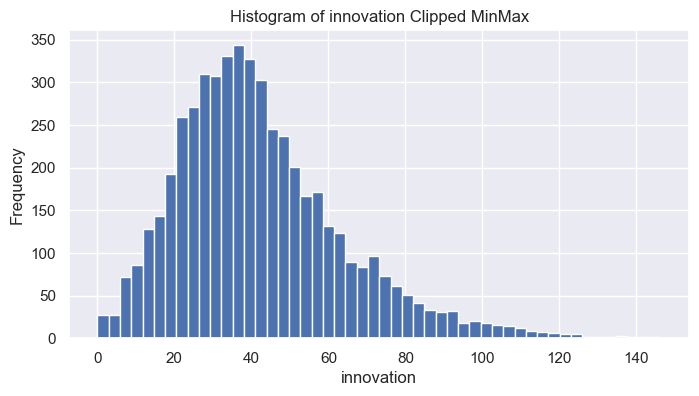

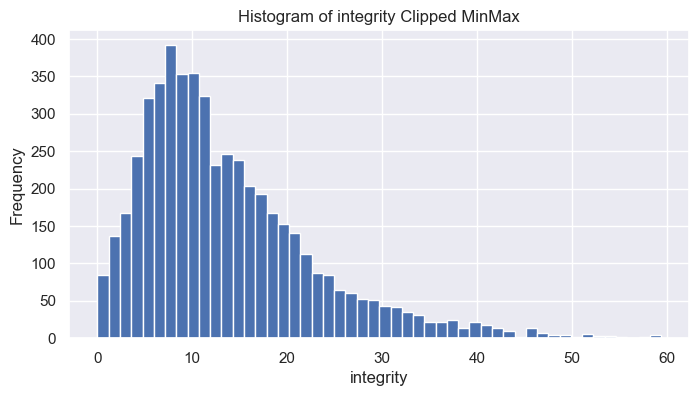

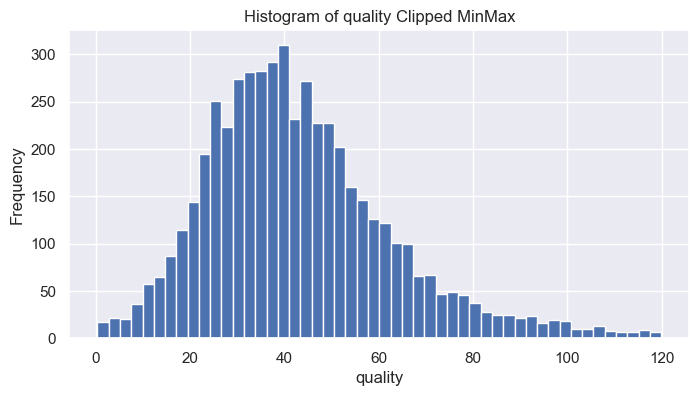

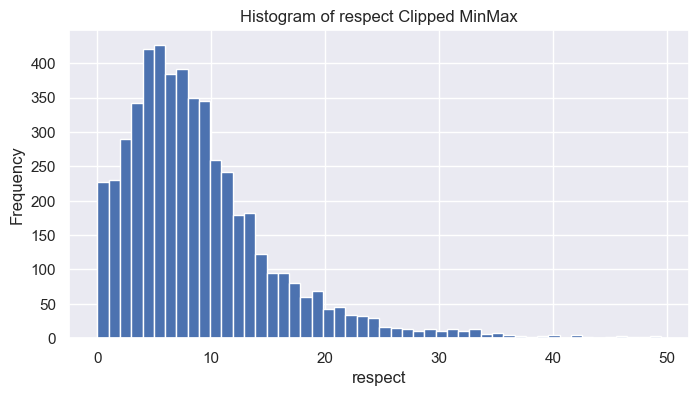

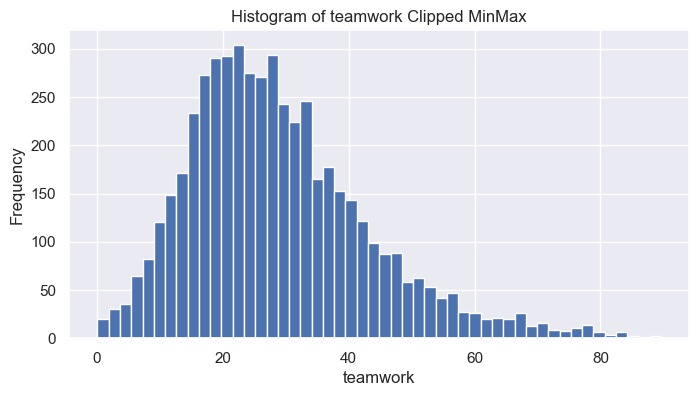

In [39]:
for column in vars:
    plt.figure(figsize=(8, 4))  # Specify the figure size for each histogram
    scores_clipped[column].hist(bins=50)  # You can adjust the number of bins
    plt.title(f'Histogram of {column} Clipped MinMax')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [40]:
scores_clipped.describe().to_excel('summary_scores_wwfidf_clipped.xlsx')
scores_clipped.describe()

,innovation,integrity,quality,respect,teamwork
count,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000
mean,42.214511,13.624321,43.096209,8.956779,28.881717
std,21.761804,9.218149,19.785945,6.714616,14.362602
min,0.000000,0.000000,0.334028,0.000000,0.114075
25%,27.152240,7.105244,29.536627,4.441631,18.707287
50%,38.837022,11.335686,40.272412,7.583363,26.766106
75%,53.655073,18.039620,53.256094,11.624217,36.776438
max,146.393315,59.418675,119.854833,49.501777,89.628308


In [51]:
clipped_scaled = scores_clipped.copy()
clipped_scaled = clipped_scaled.drop(columns=['ticker'])

scaleMinMax = MinMaxScaler(feature_range=(0, 5))

clipped_scaled = scaleMinMax.fit_transform(clipped_scaled) # Fit and transform the clipped scores

clipped_scaled = pd.DataFrame(clipped_scaled, columns=vars) # Convert the scaled scores to a DataFrame
clipped_scaled['tickers'] = scores_clipped['ticker']

In [54]:
clipped_scaled.describe().to_excel('summary_scores_wfidf_clipped_scaled.xlsx')

In [56]:
clipped_scaled.head().to_excel('sample_scores_clipped_scaled.xlsx')